In [18]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

import wrangle as w
import my_model as m

np.random.seed(42)

# For modeling:
* INCLUDE monthly_charges, tenure, contract_type, payment_type, paperless_billing, internet_service_type, online_security, online_backup, device_protection, tech_support
* EXCLUDE multiple_lines (and phone_service which is directly related), streaming_tv, streaming_movies, total_charges (because it's related to tenure)
* FOR NOW EXCLUDE: gender, senior_citizen, partner, dependents 

In [2]:
df = w.get_telco_data()

csv file found and read


In [3]:
df = w.prep_telco2(df)

In [4]:
df = w.prep_telco_for_model2(df)

In [5]:
target = 'churn_encoded'
train, validate, test = w.split_function(df, target)

Prepared df: (7043, 15)

Train: (4225, 15)
Validate: (1409, 15)
Test: (1409, 15)


In [6]:
X_train, X_validate, X_test, y_train, y_validate, y_test, baseline_accuracy = (
    m.get_X_y_baseline(train, validate, test, target)
    )
baseline_accuracy

0.7346745562130178

# Check some models with all columns: make/fit/use the model
1. Logistic Regression
2. knn
3. Random Forest
4. Decision Tree

## 1. Logistical Regression 
* Quick Summary up front - logit1 (C=1) is about the best with .808/.785 accuracy for train/validate

In [7]:
logit1 = LogisticRegression()

In [8]:
logit1.fit(X_train, y_train)

LogisticRegression()

In [9]:
logit1.score(X_train, y_train)

0.8087573964497041

In [10]:
y_pred = logit1.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         2798          306
1_actual          502          619

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3104
           1       0.67      0.55      0.61      1121

    accuracy                           0.81      4225
   macro avg       0.76      0.73      0.74      4225
weighted avg       0.80      0.81      0.80      4225

Accuracy: 0.8087573964497041

True Positive Rate/Sensitivity/Recall/Power: 0.552185548617306
False Positive Rate/False Alarm Ratio/Fall-out: 0.09858247422680412
True Negative Rate/Specificity/Selectivity: 0.9014175257731959
False Negative Rate/Miss Rate: 0.44781445138269405

Precision/PPV: 0.6691891891891892
F1 Score: 0.6050830889540567

Support (0): 1121
Support (1): 3104


(2798, 306, 502, 619)

In [11]:
logit_results_df = m.get_multi_logit_scores(X_train, X_validate, y_train, y_validate)
logit_results_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,C,train_acc,val_acc,coef_tenure,coef_monthly_charges,coef_paperless_billing_encoded,coef_internet_service_type_Fiber optic,coef_internet_service_type_None,coef_online_security_Yes,coef_online_backup_Yes,coef_device_protection_Yes,coef_tech_support_Yes,coef_contract_type_One year,coef_contract_type_Two year,coef_payment_type_Credit card (automatic),coef_payment_type_Electronic check,coef_payment_type_Mailed check
0,0.01,0.801183,0.786373,-0.043721,0.024622,0.330319,0.17534,-0.193631,-0.260409,-0.140689,-0.11984,-0.330529,-0.289373,-0.322111,-0.073057,0.349438,-0.090815
0,0.1,0.809941,0.789212,-0.033284,0.014184,0.470614,0.405828,-0.705947,-0.40598,-0.224687,-0.105135,-0.47101,-0.685432,-1.013324,-0.025816,0.476938,-0.021109
0,1.0,0.808757,0.784954,-0.03031,0.012049,0.516711,0.471649,-0.786238,-0.406911,-0.238226,-0.066288,-0.470371,-0.804333,-1.326667,-0.038206,0.519934,0.039833
0,10.0,0.807337,0.786373,-0.029976,0.010679,0.49348,0.480453,-0.94291,-0.425693,-0.246964,-0.084157,-0.47749,-0.826431,-1.329511,-0.007159,0.503023,0.041097
0,100.0,0.807574,0.787793,-0.029846,0.010748,0.493567,0.477438,-0.934152,-0.42199,-0.246466,-0.07871,-0.472686,-0.833023,-1.357878,0.000606,0.505266,0.05669
0,1000.0,0.808757,0.787083,-0.029807,0.010787,0.508084,0.489948,-0.978048,-0.428012,-0.252995,-0.071341,-0.485024,-0.839803,-1.320743,-0.040475,0.466009,0.06952


## 2. knn 
* Quick Summary up front: setting n_neighbors to 14 when making the model has accuracy of .815/.787 for train/validate

In [12]:
knn1 = KNeighborsClassifier()

In [13]:
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn1.score(X_train, y_train)

0.8383431952662722

In [17]:
# results_df = m.get_knn_metrics(X_train, X_validate, y_train, y_validate)
results_df['diff'] = results_df.train_acc - results_df.val_acc
results_df

,train_acc,val_acc,diff
1,0.994793,0.736693,0.258100
2,0.875030,0.771469,0.103560
3,0.859408,0.766501,0.092907
4,0.841420,0.773598,0.067822
5,0.838343,0.754436,0.083907
6,0.831243,0.775018,0.056225
7,0.827456,0.763662,0.063793
8,0.822959,0.774308,0.048651
9,0.822249,0.772889,0.049360
10,0.818935,0.780696,0.038239


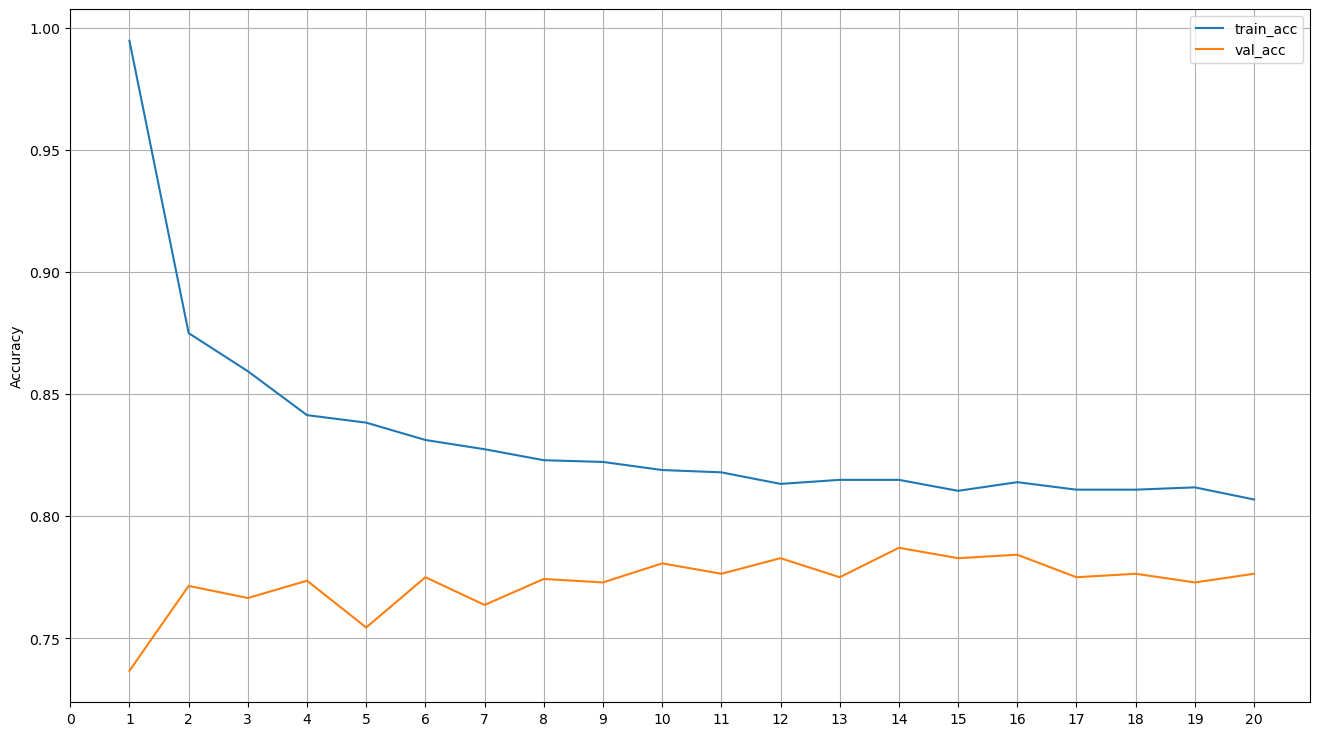

In [16]:
# plot the data
results_df[['train_acc','val_acc']].plot(figsize = (16,9))
# results_df.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

## 3. Random Forest
* Best rf model was with min_samples_leaf = 7, max_depth = 5. Yielded an accuracy of .808/.784 on train/validate

In [19]:
rf = RandomForestClassifier(random_state=42)

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_pred = rf.predict(X_train)
m.get_classifier_metrics(y_train, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual         3093           11
1_actual           10         1111

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       0.99      0.99      0.99      1121

    accuracy                           1.00      4225
   macro avg       0.99      0.99      0.99      4225
weighted avg       1.00      1.00      1.00      4225

Accuracy: 0.9950295857988166

True Positive Rate/Sensitivity/Recall/Power: 0.9910793933987511
False Positive Rate/False Alarm Ratio/Fall-out: 0.0035438144329896907
True Negative Rate/Specificity/Selectivity: 0.9964561855670103
False Negative Rate/Miss Rate: 0.008920606601248885

Precision/PPV: 0.9901960784313726
F1 Score: 0.9906375390102542

Support (0): 1121
Support (1): 3104


(3093, 11, 10, 1111)

In [23]:
y_pred = rf.predict(X_validate)
m.get_classifier_metrics(y_validate, y_pred)

CONFUSION MATRIX
          0_predicted  1_predicted
0_actual          893          142
1_actual          189          185

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

Accuracy: 0.7650816181689141

True Positive Rate/Sensitivity/Recall/Power: 0.4946524064171123
False Positive Rate/False Alarm Ratio/Fall-out: 0.13719806763285025
True Negative Rate/Specificity/Selectivity: 0.8628019323671497
False Negative Rate/Miss Rate: 0.5053475935828877

Precision/PPV: 0.5657492354740061
F1 Score: 0.5278174037089871

Support (0): 374
Support (1): 1035


(893, 142, 189, 185)

In [24]:
def get_rf_scores(X_train, X_validate, y_train, y_validate):
    """
    This function will
    - take a while to run if you have a large dataset!
    - take in X_train, X_validate, y_train, y_validate
    - make multiple RandomForest classifier models with hyperparameters that vary:
        - max_depth varies from 10 to 1
        - min_samples_leaf varies from 1 to 10
    - returns a dataframe with train/validate accuracies and their difference
    """

    # initialize random forest accuracy dataframe
    rf_acc_init = pd.Series(range(1,11))
    rf_acc_df = pd.DataFrame(rf_acc_init, columns=['min_samples_leaf'])

    for y in range(10, 0, -1): # max_depth = 10-1 
        train_acc_list = []
        val_acc_list = []
        for x in range(1, 11):  # min_samples_leaf = 1-10
            rf = RandomForestClassifier(min_samples_leaf=x, random_state=42, max_depth = y, criterion='entropy')
            rf.fit(X_train, y_train)
            train_acc = rf.score(X_train, y_train)
            val_acc = rf.score(X_validate, y_validate)
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
        new_col_t = 'trn_acc_depth_' + str(y)
        rf_acc_df[new_col_t] = pd.Series(train_acc_list)
        new_col_v = 'val_acc_depth_' + str(y)
        rf_acc_df[new_col_v] = pd.Series(val_acc_list)
        new_col_d = 'diff_' + str(y)
        rf_acc_df[new_col_d] = rf_acc_df[new_col_t] - rf_acc_df[new_col_v]
    
    return rf_acc_df

In [26]:
results_df = get_rf_scores(X_train, X_validate, y_train, y_validate)
results_df.T

,0,1,2,3,4,5,6,7,8,9
min_samples_leaf,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
trn_acc_depth_10,0.872663,0.855621,0.847101,0.841183,0.837870,0.833609,0.832189,0.832426,0.829586,0.830533
val_acc_depth_10,0.783534,0.795600,0.792761,0.797019,0.793471,0.789212,0.789922,0.791341,0.792761,0.789922
diff_10,0.089128,0.060022,0.054340,0.044164,0.044399,0.044397,0.042267,0.041085,0.036825,0.040611
trn_acc_depth_9,0.849231,0.840710,0.837633,0.834556,0.832899,0.832426,0.832189,0.828876,0.827219,0.825799
val_acc_depth_9,0.793471,0.789922,0.791341,0.790632,0.792051,0.794180,0.793471,0.793471,0.788502,0.789212
diff_9,0.055760,0.050788,0.046292,0.043925,0.040848,0.038246,0.038719,0.035405,0.038716,0.036587
trn_acc_depth_8,0.833373,0.831006,0.830296,0.827692,0.827219,0.828166,0.828876,0.825562,0.826509,0.824615
val_acc_depth_8,0.789922,0.792051,0.791341,0.789922,0.789922,0.789922,0.786373,0.790632,0.789922,0.791341
diff_8,0.043451,0.038955,0.038954,0.037770,0.037297,0.038244,0.042502,0.034930,0.036587,0.033274


## 1. Decision Tree
* 